In [47]:
import numpy as np
import math
import time
from scipy.stats import expon, uniform, chi2, norm, spearmanr, kendalltau
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.runs import runstest_1samp  

In [48]:
def gen_expon_values(n, lambd):
    vals = np.random.exponential(scale=1.0/lambd, size=n)
    return vals

def gen_unif_values(n, a, b):
    return np.random.uniform(low=a, high=b, size=n)

In [49]:
gamma = 0.05 
Z_gamma = 1.96

## Завдання 1. Перевірка гіпотези однорідності: критерій пустих блоків.
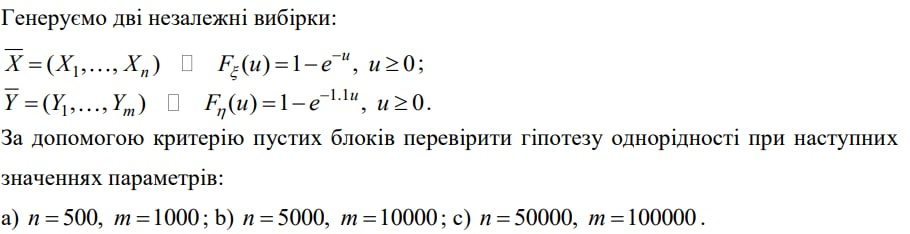

In [50]:
def empty_box_test_2samp(X, n, Y, m, gamma):
    
    print("Z_gamma=", Z_gamma)
    X_ord = np.sort(X) #order statistics
    X_ord = np.insert(X_ord, 0, float("-inf"))
    X_ord = np.append(X_ord, float("+inf"))
    v = np.histogram(Y, bins = X_ord)[0]
    k = np.sum(np.array(v) == 0)
    ro = m/n
    bound = n/(1+ro) + np.sqrt(n)*ro*Z_gamma/((1+ro)**1.5)
    print("k=", k)
    print("bound=", bound)
    if k < bound:
        print("Гіпотезу приймаємо")
    else:
        print("Гіпотезу відхиляємо")    

In [51]:
n_m = [[500, 1000], [5000, 10000], [50000, 100000]]
lambd_real_X = 1 
lambd_real_Y = 1.3

for n_i, m_i in n_m:
    print("n=", n_i, "m=", m_i)
    X = gen_expon_values(n_i, lambd_real_X)
    Y = gen_expon_values(m_i, lambd_real_Y)
    empty_box_test_2samp(X, n_i, Y, m_i, gamma)
    print("\n")

n= 500 m= 1000
Z_gamma= 1.96
k= 168
bound= 183.5356607968145
Гіпотезу приймаємо


n= 5000 m= 10000
Z_gamma= 1.96
k= 1694
bound= 1720.011109953945
Гіпотезу приймаємо


n= 50000 m= 100000
Z_gamma= 1.96
k= 17133
bound= 16835.356607968148
Гіпотезу відхиляємо




## Завдання 2. Перевірка гіпотези незалежності
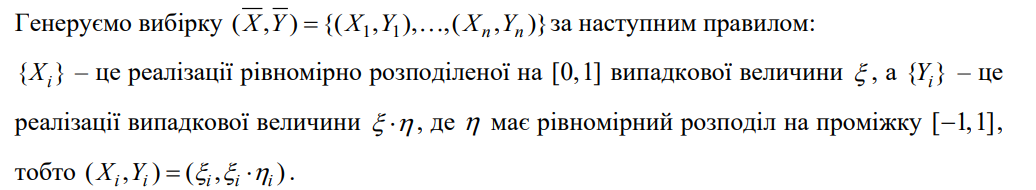
### A. Критерій Спірмена

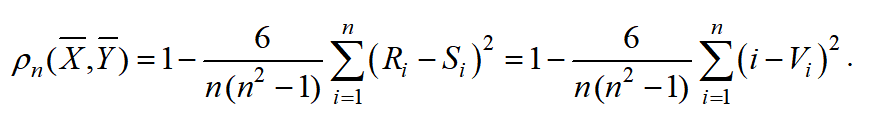

In [52]:
def gen_X_Y(n):
    X = gen_unif_values(n, 0, 1)
    eta = np.random.normal(-1, 1, n)
    Y = X * eta
    return X, Y

def spearman(V, n, gamma):    
    summ = np.array([(i+1 - V[i]) for i in range(n)])
    summ = np.sum(summ ** 2)
    
    ro = 1 - summ * (6/(n*(n**2 - 1)))
    print("|ro|=", abs(ro)) #statistics
    print("Z_gamma=", Z_gamma)
    print("Z/ sqrt(n)=", Z_gamma/np.sqrt(n))
    
    if abs(ro) < Z_gamma/math.sqrt(n):
        print("Гіпотезу приймаємо")
    else:
        print("Гіпотезу відхиляємо")
        

### B. Критерій Кендалла
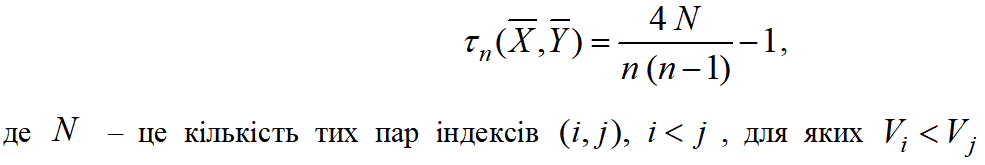

In [53]:
def MergeAndCountSplitInv(A, L, R):
    M = []
    i = 0
    j = 0
    c = 0 #number of split inversions
    for k in range(len(L) + len(R)):
        if len(L) > i and len(R) > j:
            if L[i] <= R[j]:
                M.append(L[i])
                i += 1
            else:
                M.append(R[j])
                j += 1
                c += (len(L) - i)
        elif len(L)<= i:
            M.append(R[j])
            j += 1
        elif len(R)<= j:
            M.append(L[i])
            i += 1
    return M, c

def SortAndCountInv(A):
    if len(A) == 1:
        return A, 0
    else:
        n2 = int(len(A)/2)
        La = A[:n2]
        Ra = A[n2:]
        L, x = SortAndCountInv(La)
        R, y = SortAndCountInv(Ra)
        A, z = MergeAndCountSplitInv(A, L, R)
        return A, x + y + z
    
def get_N(V):
    inv = SortAndCountInv(V)[1]
    l = len(V)
    allpairs = l*(l-1)/2
    res = allpairs-inv
    return res

In [54]:
def kendall(V, n, gamma):
    N = int(get_N(V))
    print("N=", N)
    tau = (4*N/(n*(n-1))) - 1
    print("|tau|=", abs(tau)) 
    print("Z_gamma=", Z_gamma)
    print("2/3 * Z_gamma/sqrt(n)=", 2*Z_gamma/(3*math.sqrt(n)))
    if abs(tau) < 2*Z_gamma/(3*math.sqrt(n)):
        print("Гіпотезу приймаємо ")
    else:
        print("Гіпотезу відхиляємо")

In [55]:
for n in [500, 5000, 50000]:
    X, Y = gen_X_Y(n)

    X_ord = list(np.sort(X))
    Y_ord = list(np.sort(Y))
    R = np.array([X_ord.index(X[i])+1 for i in range(n)]) #ранг x
    S = np.array([Y_ord.index(Y[i])+1 for i in range(n)]) #ранг y
    V = np.array(list(S[R.argsort()])).astype('int64')
    
    print("N =", n)
    print("\n Критерій Спірмена")
    spearman(V, n, gamma)
    print("\n")
    print(" Критерій Кендалла")
    kendall(V, n, gamma)
    print("\n")

N = 500

 Критерій Спірмена
|ro|= 0.48123197292789177
Z_gamma= 1.96
Z/ sqrt(n)= 0.08765386471799175
Гіпотезу відхиляємо


 Критерій Кендалла
N= 40391
|tau|= 0.3524488977955912
Z_gamma= 1.96
2/3 * Z_gamma/sqrt(n)= 0.058435909811994494
Гіпотезу відхиляємо


N = 5000

 Критерій Спірмена
|ro|= 0.45207320221092817
Z_gamma= 1.96
Z/ sqrt(n)= 0.027718585822512663
Гіпотезу відхиляємо


 Критерій Кендалла
N= 4157409
|tau|= 0.3346814962992598
Z_gamma= 1.96
2/3 * Z_gamma/sqrt(n)= 0.01847905721500844
Гіпотезу відхиляємо


N = 50000

 Критерій Спірмена
|ro|= 0.4670785554293915
Z_gamma= 1.96
Z/ sqrt(n)= 0.008765386471799176
Гіпотезу відхиляємо


 Критерій Кендалла
N= 408374631
|tau|= 0.346587522150443
Z_gamma= 1.96
2/3 * Z_gamma/sqrt(n)= 0.005843590981199451
Гіпотезу відхиляємо




## Завдання 3. Перевірка гіпотези випадковості.
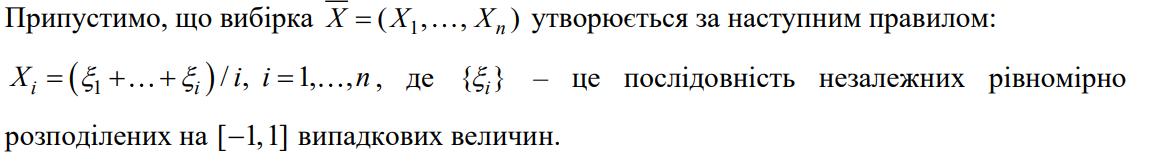
#### Перевірити гіпотезу випадковості за допомогою критерію, що ґрунтується на обчисленні кількості інверсій

In [56]:
def gen_X(n):
    ksi = gen_unif_values(n, -1, 1)
    X = [np.sum(ksi[:i])/i for i in range(1, n+1)]
    return X

def randomness_test(X, n, gamma):
    S = SortAndCountInv(X)[1]
    print("number of inversions=", S)
    bound = (6/(n*math.sqrt(n)))*abs(S - n*(n-1)/4)
    print("z_gamma=", Z_gamma)
    print("bound=", bound)
    if bound <= Z_gamma:
        print("Гіпотезу приймаємо")
    else:
        print("Гіпотезу відхиляємо")    

In [57]:
for n in [500, 5000, 50000]:
    print("n=", n)
    X = gen_X(n)
    randomness_test(X, n, gamma)
    print("\n")

n= 500
number of inversions= 28577
z_gamma= 1.96
bound= 18.137910120849096
Гіпотезу відхиляємо


n= 5000
number of inversions= 4591639
z_gamma= 1.96
bound= 28.1221062066917
Гіпотезу відхиляємо


n= 50000
number of inversions= 551189984
z_gamma= 1.96
bound= 39.60390296319081
Гіпотезу відхиляємо


